In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Define the stock symbol and the date range
symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Download historical data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [4]:
# Display the rows of the DataFrame
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953903,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944000,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056946,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400


In [5]:
# Basic statistics
print(data.describe())

             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   154.802709  156.907809  152.691315  154.835060  153.523795   
std     13.063034   12.937389   13.108058   13.056081   12.774158   
min    127.989998  129.949997  125.870003  126.040001  125.339409   
25%    144.330002  146.709999  142.324997  144.645004  143.656746   
50%    154.009995  155.830002  151.940002  154.089996  152.767532   
75%    166.189995  167.989998  164.044998  165.915001  164.352913   
max    182.630005  182.940002  179.119995  182.009995  179.953903   

             Volume  
count  2.510000e+02  
mean   8.791038e+07  
std    2.365699e+07  
min    3.519590e+07  
25%    7.229740e+07  
50%    8.373720e+07  
75%    9.693705e+07  
max    1.826020e+08  


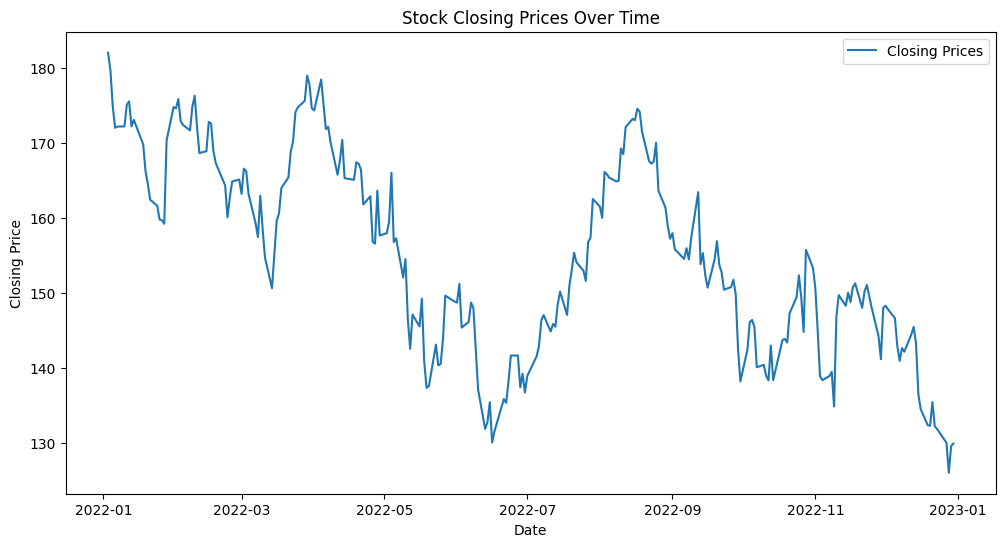

In [6]:
# Plot closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Prices')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [7]:
# Calculate daily percentage change
data['Daily_Return'] = data['Close'].pct_change()
data['Daily_Return']

Date
2022-01-03         NaN
2022-01-04   -0.012692
2022-01-05   -0.026600
2022-01-06   -0.016693
2022-01-07    0.000988
                ...   
2022-12-23   -0.002798
2022-12-27   -0.013878
2022-12-28   -0.030685
2022-12-29    0.028324
2022-12-30    0.002469
Name: Daily_Return, Length: 251, dtype: float64

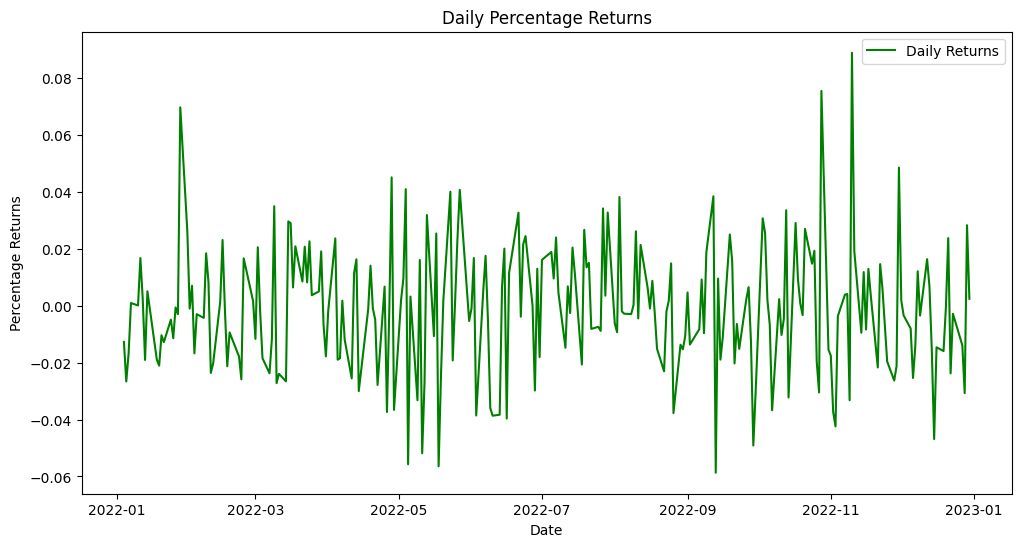

In [8]:
# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(data['Daily_Return'], label='Daily Returns', color='green')
plt.title('Daily Percentage Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.legend()
plt.show()

In [9]:
# Calculate 50-day moving average
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA50']

Date
2022-01-03           NaN
2022-01-04           NaN
2022-01-05           NaN
2022-01-06           NaN
2022-01-07           NaN
                 ...    
2022-12-23    144.131800
2022-12-27    143.964799
2022-12-28    143.637399
2022-12-29    143.354599
2022-12-30    143.075999
Name: MA50, Length: 251, dtype: float64

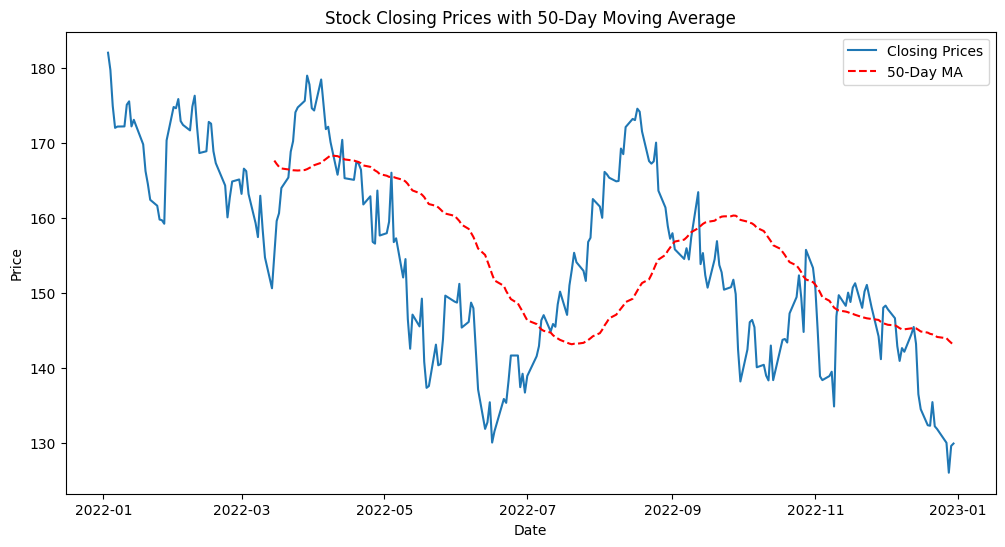

In [10]:
# Plot closing prices and moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Prices')
plt.plot(data['MA50'], label='50-Day MA', linestyle='--', color='red')
plt.title('Stock Closing Prices with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
# Calculate annualized volatility
annual_volatility = data['Daily_Return'].std() * np.sqrt(252)
annual_volatility

0.3567158403560513

In [12]:
# Example: Correlation analysis
correlation_matrix = data[['Close', 'Volume']].corr()
correlation_matrix


,Close,Volume
Close,1.000000,-0.077314
Volume,-0.077314,1.000000
